# Data Exploration and Multivariate Analysis 

In this file we will do some data exploration of the *FoodHub* data and then do some simple multivariate analysis. We will look at **PCA (Principle Component Analysis)**. 

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

## Helper Packages for Development

You can use the *help* function from **pydoc** to search the documentation of any function by using it like so:

```
    help(name_of_function)
```

And you can use the *set_trace()* function from **pdb (Python Debugger)** to stop your code within any part to look at all the variables as if the code was running. 

```
    pdb.set_trace()
```

We will get into using the Python Debugger more later. 

In [47]:
from pydoc import help
import pdb

In [48]:
df = pd.read_csv("data/foodhub_order.csv")

In [49]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [50]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [10]:
df.shape

(1898, 9)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Ratings as Dependent Variable 

Now we are going to subset the dataframe by just rows with values for the **rating** column and then subset the columns to just those with numeric values. We are going to use ratings as our *dependent variable* and the other numeric columns as our *independent variables*. Then we can perform PCA and determine the number of components (dimensions) to use from our data. 

In [52]:
given_df = df[df["rating"] != "Not given"]
given_df.shape

(1162, 9)

In [53]:
given_df["day_of_the_week"] = given_df["day_of_the_week"].astype('category')
given_df["day_of_the_week_encode"] = given_df["day_of_the_week"].cat.codes
given_df.head()

/var/folders/34/wft3ncqd4ks3489rf30mb_x80000gn/T/ipykernel_18482/1727958417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  given_df["day_of_the_week"] = given_df["day_of_the_week"].astype('category')
/var/folders/34/wft3ncqd4ks3489rf30mb_x80000gn/T/ipykernel_18482/1727958417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  given_df["day_of_the_week_encode"] = given_df["day_of_the_week"].cat.codes


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,day_of_the_week_encode
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,0
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,1
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,0
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,0
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0


In [55]:
# Restaurant Name Encode 

given_df["restaurant_name"] = given_df["restaurant_name"].astype("category")
given_df["restaurant_name_encode"] = given_df["restaurant_name"].cat.codes

# Cuisine Type Encode

given_df["cuisine_type"] = given_df["cuisine_type"].astype("category")
given_df["cuisine_type_encode"] = given_df["cuisine_type"].cat.codes

given_df.head()

/var/folders/34/wft3ncqd4ks3489rf30mb_x80000gn/T/ipykernel_18482/3718205418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  given_df["restaurant_name"] = given_df["restaurant_name"].astype("category")
/var/folders/34/wft3ncqd4ks3489rf30mb_x80000gn/T/ipykernel_18482/3718205418.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  given_df["restaurant_name_encode"] = given_df["restaurant_name"].cat.codes
/var/folders/34/wft3ncqd4ks3489rf30mb_x80000gn/T/ipykernel_18482/3718205418.py:8: SettingWithCopyWarning

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,day_of_the_week_encode,restaurant_name_encode,cuisine_type_encode
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,0,25,8
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,1,16,0
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,0,41,0
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,0,126,3
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0,10,7


### Categorical Variables Now Numeric!

We now encoded our 3 categorical variables as numeric variables so we can use in our analysis. It also allows us to use within some data visualization methods, **e.g. heatmaps**.

First we need to subset the columns of our data to be just those that are numeric. 

In [57]:
# Subset just numeric columns 

num_given_df = given_df[["rating", "cost_of_the_order", "food_preparation_time", "delivery_time", "day_of_the_week_encode", "restaurant_name_encode", "cuisine_type_encode"]]
#num_given_df.head()

<Axes: >

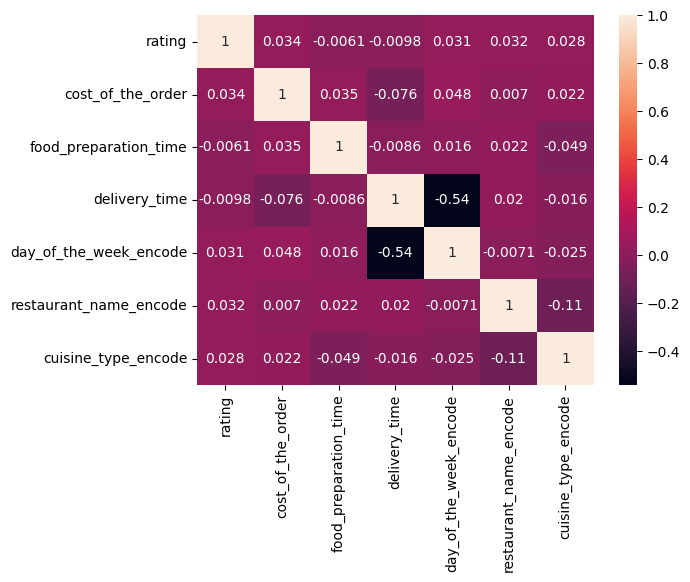

In [58]:
# Heatmap 

sns.heatmap(data = num_given_df.corr(), annot = True)

### Ratings as Dependent Variable

Next we assign the *rating* column as our dependent variable and the others as our independent variables. Now the real Data **Science** part begins! 



In [59]:
X = num_given_df.loc[:, "cost_of_the_order":]
y = num_given_df["rating"]

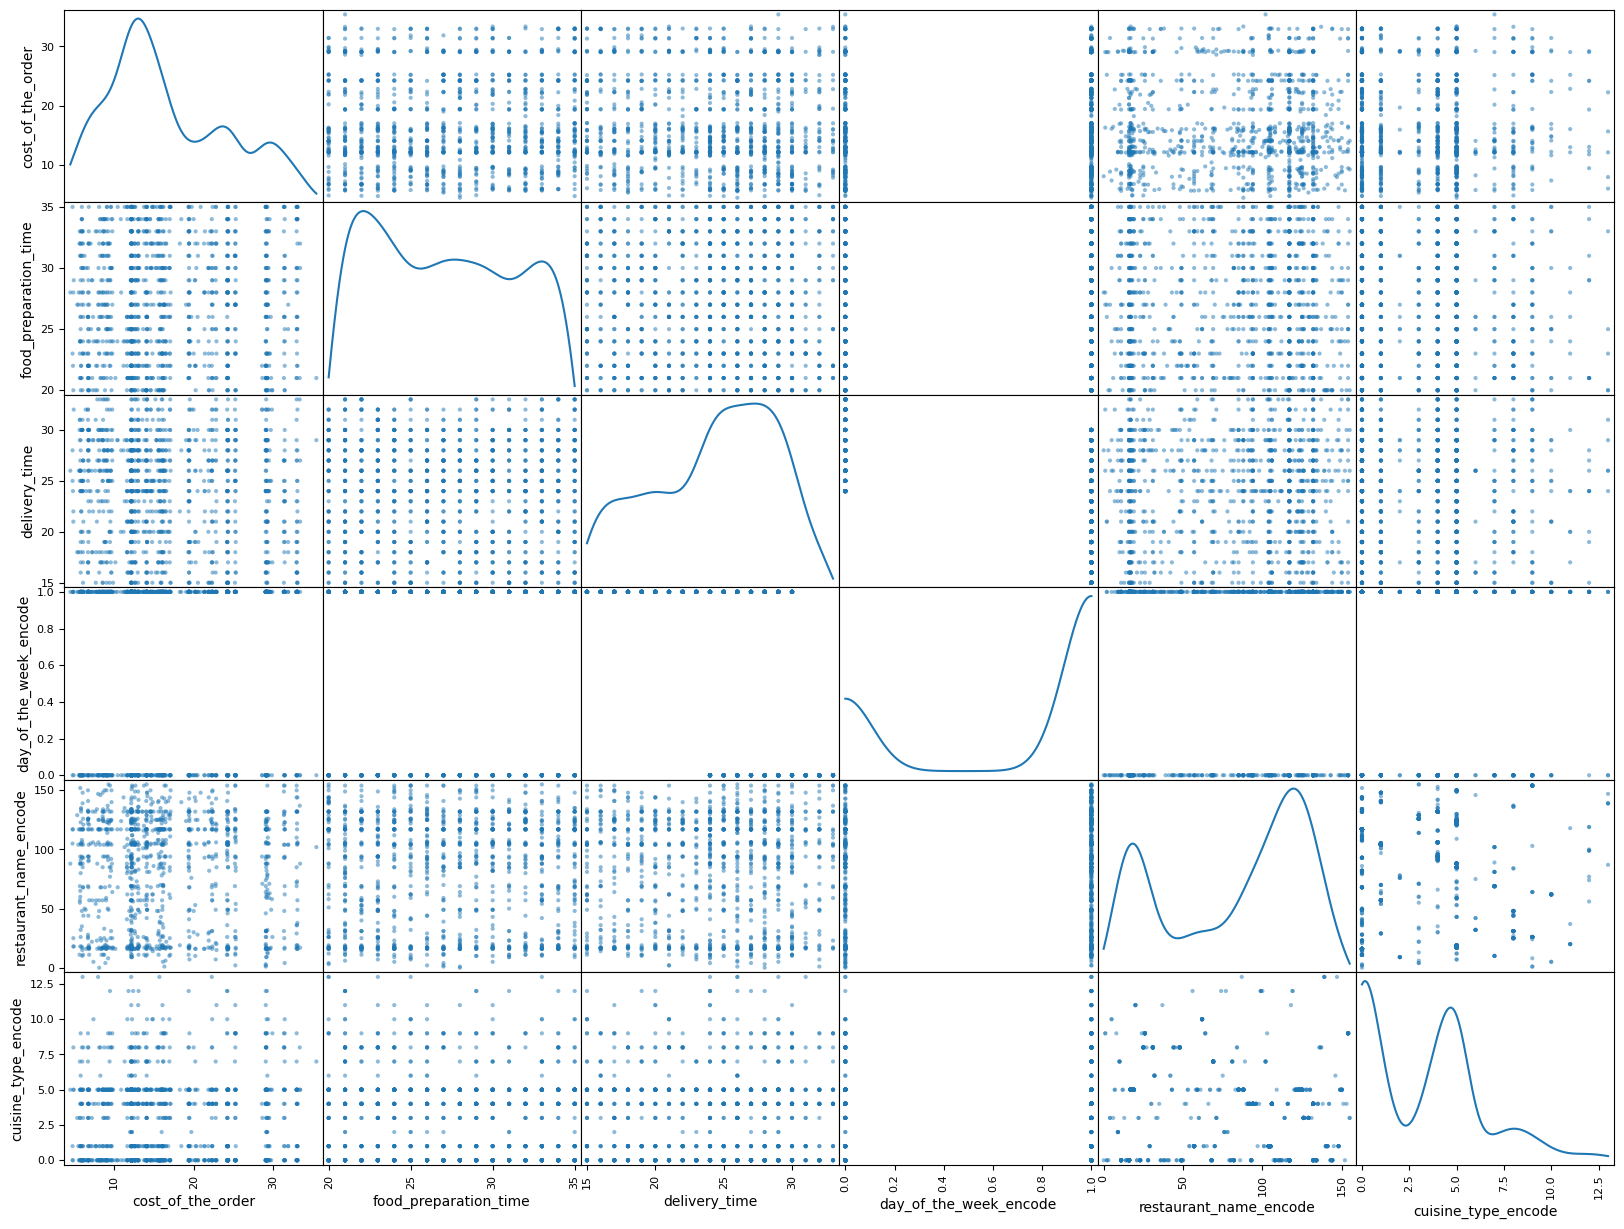

In [60]:
# Plot scatters with Kernel Density Estimation (KDE) on the diagonals

pd.plotting.scatter_matrix(num_given_df.loc[:, "cost_of_the_order":"cuisine_type_encode"], diagonal = "kde", figsize = (20, 15))
plt.show()

In [61]:
stand_X = scale(X)

pca = PCA().fit(stand_X)

def pca_summary(pca, standardised_data, out=True):
    names = ["PC" + str(i) for i in range(1, len(pca.explained_variance_ratio_) + 1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

summary = pca_summary(pca, stand_X)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.247795,0.259499,0.259499
PC2,1.063406,0.188472,0.447971
PC3,1.008639,0.169559,0.617530
PC4,0.980102,0.160100,0.777630
PC5,0.937126,0.146367,0.923997
PC6,0.675291,0.076003,1.000000


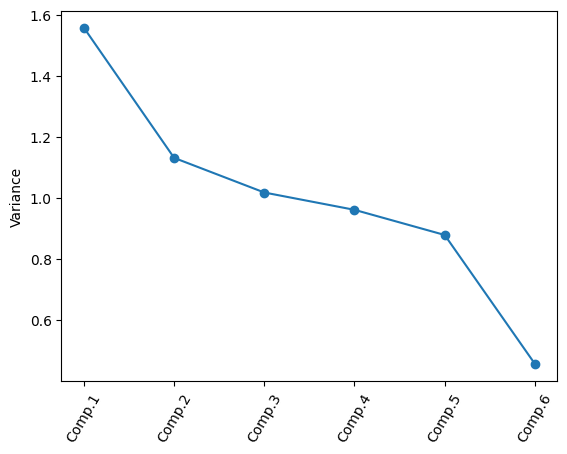

In [62]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()
    
screeplot(pca, stand_X)

In [42]:
# Utility functions 

def printMeanAndSdByGroup(variables, groupvariable):
    
    data_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(data_groupby.apply(np.std))
    print("\n## Sample sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))
    
def calcWithinGroupsVariance(variable, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # get the mean and standard deviation for each group:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # get the standard deviation for group i:
        sdi = np.std(levelidata)
        numi = (levelilength)*sdi**2
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calculate the within-groups variance
    Vw = numtotal / (denomtotal - numlevels)
    return Vw

def calcBetweenGroupsVariance(variable, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set((groupvariable)))
    numlevels = len(levels)
    # calculate the overall grand mean:
    grandmean = np.mean(variable)
    # get the mean and standard deviation for each group:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # get the mean and standard deviation for group i:
        meani = np.mean(levelidata)
        sdi = np.std(levelidata)
        numi = levelilength * ((meani - grandmean)**2)
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calculate the between-groups variance
    Vb = numtotal / (numlevels - 1)
    return(Vb)

def calcSeparations(variables, groupvariable):
    # calculate the separation for each variable
    for variablename in variables:
        variablei = variables[variablename]
        Vw = calcWithinGroupsVariance(variablei, groupvariable)
        Vb = calcBetweenGroupsVariance(variablei, groupvariable)
        sep = Vb/Vw
        print("variable", variablename, "Vw=", Vw, "Vb=", Vb, "separation=", sep)



In [43]:
calcBetweenGroupsVariance(X, y)

48.98269752299555

In [44]:
calcWithinGroupsVariance(X, y)

cost_of_the_order           57.373895
food_preparation_time       21.919904
delivery_time               24.301160
day_of_the_week_encode       0.207169
restaurant_name_encode    2043.759034
cuisine_type_encode          8.919933
dtype: float64

In [46]:
printMeanAndSdByGroup(X, y)

## Means:


rating
3    25.208324
4    25.726766
5    26.026312
dtype: float64


## Standard deviations:


,cost_of_the_order,food_preparation_time,delivery_time,day_of_the_week_encode,restaurant_name_encode,cuisine_type_encode
rating,,,,,,
3,7.820005,4.755792,4.640454,0.472028,44.717499,2.919912
4,7.623102,4.614787,4.916995,0.450159,44.867402,3.058664
5,7.442360,4.689820,5.014338,0.451754,45.470543,2.952038



## Sample sizes:


,0
rating,
3,188
4,386
5,588
